In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 44.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Telangana1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,19,0,0,0,17,0,0,0,0,0,0,0
131396,2014,12,31,20,0,19,0,0,0,17,0,0,0,0,0,0,0
131397,2014,12,31,21,0,18,0,0,0,17,0,0,0,0,0,0,0
131398,2014,12,31,22,0,17,0,0,0,16,0,0,0,0,0,0,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92,2000-01-01 02:00:00
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303,2000-01-01 03:00:00
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496,2000-01-01 04:00:00
5,2000,1,1,5,0,28,193,682,640,17,193,191,682,691,0,640,644,2000-01-01 05:00:00
6,2000,1,1,6,0,29,205,720,729,17,205,239,720,679,0,729,734,2000-01-01 06:00:00
7,2000,1,1,7,0,29,207,727,748,17,295,295,518,518,0,681,681,2000-01-01 07:00:00
8,2000,1,1,8,0,29,200,706,694,17,200,210,706,696,0,694,698,2000-01-01 08:00:00
9,2000,1,1,9,0,29,184,651,574,17,184,173,651,686,0,574,585,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,186.7
2000-01-02,187.8
2000-01-03,190.3
2000-01-04,192.8
2000-01-05,192.2
...,...
2014-12-27,184.9
2014-12-28,186.4
2014-12-29,185.7


In [8]:
y_w=y.resample('M').mean()
y_w

,GHI
Date,
2000-01-31,203.596774
2000-02-29,231.046429
2000-03-31,278.554839
2000-04-30,270.206667
2000-05-31,244.848387
...,...
2014-08-31,213.480645
2014-09-30,198.190000
2014-10-31,180.412903


In [9]:
y_w[:'2011']

,GHI
Date,
2000-01-31,203.596774
2000-02-29,231.046429
2000-03-31,278.554839
2000-04-30,270.206667
2000-05-31,244.848387
...,...
2011-08-31,179.080645
2011-09-30,199.253333
2011-10-31,195.922581


In [10]:
y[:4380]

,GHI
Date,
2000-01-01,186.7
2000-01-02,187.8
2000-01-03,190.3
2000-01-04,192.8
2000-01-05,192.2
...,...
2011-12-27,179.4
2011-12-28,177.8
2011-12-29,180.3


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values

datesInYr = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(0,5474,365):
  for j in datesInYr:
    X_add = y[i:i+j]
    #print(i,j)
    X_T.append(X_add)
    i+=j
X_T=np.asarray(X_T)
X_T.shape

(180,)

In [14]:
X_T

array([array([186.7, 187.8, 190.3, 192.8, 192.2, 196.3, 194.9, 198.1, 198.2,
       198.9, 200.6, 203.7, 176.6, 192.1, 197.1, 175.5, 202.6, 207.8,
       215. , 214. , 212.2, 211.5, 217. , 220.8, 218.9, 194.2, 208.7,
       218.6, 229.2, 228.4, 230.8]),
       array([242.1, 240.9, 242.4, 244.1, 236.3, 228.5, 250.2, 208.4, 230.1,
       238.9, 225.7, 248.3, 233.6, 234.7, 251.8, 254.4, 263.5, 275.4,
       201.1, 249.2, 114.5, 178.7, 244. , 173.4, 143.8, 264. , 271.5,
       279.8]),
       array([267.1, 268.7, 269. , 269.5, 271.4, 269.9, 271.5, 273.2, 273. ,
       274.2, 274.3, 280.8, 277.6, 277.7, 277.7, 279.5, 284. , 281.6,
       281.9, 286.5, 282.3, 276.6, 281.1, 287.6, 289.5, 287.6, 283.5,
       286.6, 273.1, 287.4, 290.8]),
       array([273.8, 275.9, 275.7, 275.5, 274.7, 274.7, 275.4, 273.3, 278.2,
       276.3, 275.5, 261.4, 243.9, 269.1, 276.5, 274.5, 274.9, 273.2,
       254.5, 276.2, 277.9, 276.7, 213.6, 226. , 280.3, 276.4, 280.2,
       281. , 280. , 280.9]),
       array

In [15]:
for new in X_T[0:144:12]:
  print(len(new))

31
31
31
31
31
31
31
31
31
31
31
31


In [16]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(180,)

In [17]:
foo=[x.tolist() for x in X_T[0:144:12]]
foo_1=np.array(foo)
foo_2=foo_1.reshape(12,31,1)
foo_2.shape

(12, 31, 1)

In [18]:
Y_T[j:144:12]

array([150.32903226, 184.29032258, 183.94193548, 192.65806452,
       184.89032258, 186.78387097, 171.2516129 , 201.96451613,
       191.06129032, 179.08064516])

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

modelList=[]
j=0
for i in datesInYr:
  model = Sequential()
  model.add(LSTM(50, activation='relu', input_shape=(i,1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  foo=[xd.tolist() for xd in X_T[j:144:12]]
  foo_1=np.array(foo)
  foo_1=foo_1.reshape(12,i,1)
  # fit model
  model.fit(foo_1, Y_T[j:144:12], epochs=2000, verbose=0)
  modelList.append(model)
  j+=1

In [20]:
X_T[144].shape

(31,)

In [21]:
modelList

In [22]:
# demonstrate prediction
yhat=[]

datesInYr = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(144,180):
  x_input = X_T[i]
  x_input = x_input.reshape(1,datesInYr[i%12],1)
  #print((i-144)%12)
  yRez = modelList[((i-144)%12)].predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[192.13795]]
[[240.0788]]
[[273.52353]]
[[302.8531]]
[[247.99217]]
[[179.12233]]
[[173.02101]]
[[111.1176]]
[[198.42865]]
[[204.99559]]
[[128.49306]]
[[170.89178]]
[[177.805]]
[[174.95638]]
[[245.46628]]
[[259.0722]]
[[246.44806]]
[[56.058353]]
[[189.09775]]
[[132.76498]]
[[174.81223]]
[[195.56192]]
[[144.50409]]
[[205.09439]]
[[201.09674]]
[[159.906]]
[[182.43967]]
[[254.3617]]
[[256.3764]]
[[198.63586]]
[[173.80067]]
[[107.623184]]
[[152.27824]]
[[186.10825]]
[[165.19557]]
[[253.41783]]


[array([[192.13795]], dtype=float32),
 array([[240.0788]], dtype=float32),
 array([[273.52353]], dtype=float32),
 array([[302.8531]], dtype=float32),
 array([[247.99217]], dtype=float32),
 array([[179.12233]], dtype=float32),
 array([[173.02101]], dtype=float32),
 array([[111.1176]], dtype=float32),
 array([[198.42865]], dtype=float32),
 array([[204.99559]], dtype=float32),
 array([[128.49306]], dtype=float32),
 array([[170.89178]], dtype=float32),
 array([[177.805]], dtype=float32),
 array([[174.95638]], dtype=float32),
 array([[245.46628]], dtype=float32),
 array([[259.0722]], dtype=float32),
 array([[246.44806]], dtype=float32),
 array([[56.058353]], dtype=float32),
 array([[189.09775]], dtype=float32),
 array([[132.76498]], dtype=float32),
 array([[174.81223]], dtype=float32),
 array([[195.56192]], dtype=float32),
 array([[144.50409]], dtype=float32),
 array([[205.09439]], dtype=float32),
 array([[201.09674]], dtype=float32),
 array([[159.906]], dtype=float32),
 array([[182.43967]]

In [23]:
len(yhat)

36

In [24]:
y_w[144:].index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [25]:
y_w[144:]


,GHI
Date,
2012-01-31,193.296774
2012-02-29,244.275000
2012-03-31,268.296774
2012-04-30,248.073333
2012-05-31,248.877419
2012-06-30,218.086667
2012-07-31,169.706452
2012-08-31,192.138710
2012-09-30,193.676667


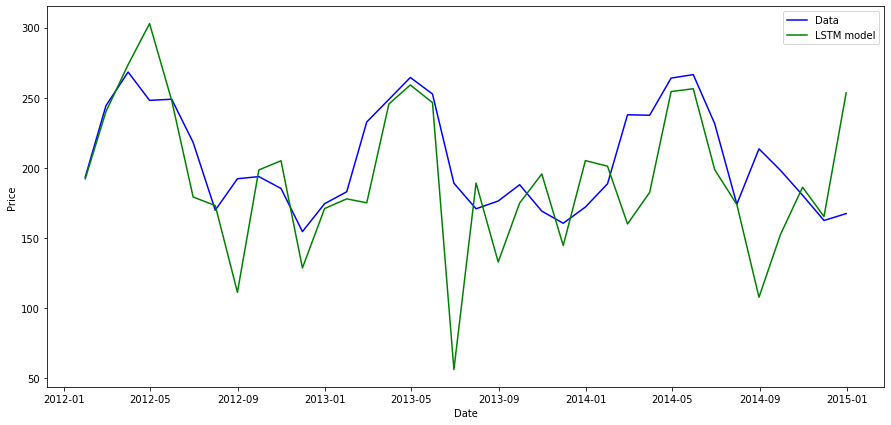

In [26]:
plt.figure(figsize = (15,7))
plt.plot(y_w[144:].index, y_w[144:], color= 'blue', label= 'Data')
plt.plot(y_w[144:].index,np.asarray(yhat).reshape(36,) , color= 'green', label= 'LSTM model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
WriteDF = pd.DataFrame(columns=['Date', 'GHI'])
WriteDF['Date'] = y_w[144:].index
WriteDF['GHI'] = np.asarray(yhat).reshape(36,)
WriteDF.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Gujarat1/LSTM_monthly.csv')

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_w[144:],np.asarray(yhat).reshape(36,),squared=False)

43.80811486838605

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_w[144:],np.asarray(yhat).reshape(36,))

0.14583526970921787